# **Barclays MDM Lab ESE**
### **Name:** Rishabh Santosh Shenoy
### **UID:** 2023300222
### **Branch:** Comps

## **Question 1: Handling Missing Values and Column Types**
**Tasks:**
1. Display total missing values per column  
2. Drop columns with >30% missing values  
3. Fill numeric missing with mean  
4. Fill categorical missing with "Unknown"  

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Customer.csv")
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,4
Annual Income ($),6
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              2000 non-null   int64  
 1   Gender                  2000 non-null   object 
 2   Age                     1996 non-null   float64
 3   Annual Income ($)       1994 non-null   float64
 4   Spending Score (1-100)  2000 non-null   int64  
 5   Profession              1965 non-null   object 
 6   Work Experience         2000 non-null   int64  
 7   Family Size             2000 non-null   int64  
 8   income_bracket          2000 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 140.8+ KB


In [ ]:
df = df.loc[:, df.isnull().mean() < 0.3]
print(df.shape)

(2000, 8)


In [ ]:
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols] = df[numeric_cols].fillna(df.mean(numeric_only=True))

In [ ]:

df[numeric_cols].isnull().sum()

,0
CustomerID,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Work Experience,0
Family Size,0


In [ ]:
categorical_cols = df.select_dtypes(include="object").columns

In [ ]:
df[categorical_cols] = df[categorical_cols].fillna("Unknown")
df[categorical_cols].isnull().sum()

,0
Gender,0
Profession,0


## **Question 2: Data Filtering and Grouping**
**Tasks:**
1. Filter where `Annual Income ($)` > 50000 and `Age` < 30  
2. Group by `Profession` and compute average income & count  
3. Sort descending by average income

In [ ]:
df = pd.read_csv("Customer.csv")

In [ ]:
filtered_df = df[(df["Annual Income ($)"] > 50000) & (df["Age"] < 30)]
filtered_df.shape

(550, 8)

In [ ]:
grouped = filtered_df.groupby("Profession").agg(
    avg_income=("Annual Income ($)", "mean"),
    customer_count=("Profession", "count")
)

In [ ]:
grouped_sorted = grouped.sort_values("avg_income", ascending=False)
grouped_sorted

,avg_income,customer_count
Profession,,
Marketing,127910.655172,29
Healthcare,123544.065217,92
Lawyer,119125.659091,44
Executive,118654.418605,43
Artist,118259.262195,164
Doctor,116179.066667,45
Engineer,115431.465116,43
Entertainment,114678.854839,62
Homemaker,108100.444444,18


In [ ]:
print(grouped_sorted.shape)

(9, 2)


## **Question 3: Feature Engineering and Encoding**
**Tasks:**
1. Create `income_bracket` column  
2. One-hot encode `Gender` & `income_bracket`  
3. Display first 5 rows

In [ ]:
def income_bracket(x):
    if x < 40000:
        return "Low"
    elif x <= 70000:
        return "Medium"
    return "High"
df["income_bracket"] = df["Annual Income ($)"].apply(income_bracket)
df["income_bracket"].value_counts()

,count
income_bracket,
High,1569
Medium,321
Low,110


In [ ]:
df_encoded = pd.get_dummies(df, columns=["Gender", "income_bracket"], dtype=int)

In [ ]:
cols = [
    'CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
    'Profession', 'Work Experience', 'Family Size',
    'Gender_Female', 'Gender_Male',
    'income_bracket_Low', 'income_bracket_Medium', 'income_bracket_High'
]

In [ ]:
df_encoded = df_encoded[cols]

In [ ]:
df_encoded.head()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Female,Gender_Male,income_bracket_Low,income_bracket_Medium,income_bracket_High
0,1,19.0,15000.0,39,Healthcare,1,4,0,1,1,0,0
1,2,21.0,35000.0,81,Engineer,3,3,0,1,1,0,0
2,3,20.0,86000.0,6,Engineer,1,1,1,0,0,0,1
3,4,23.0,59000.0,77,Lawyer,0,2,1,0,0,1,0
4,5,31.0,38000.0,40,Entertainment,2,6,1,0,1,0,0


## **Question 4: Outlier Detection and Visualization**
**Tasks:**
1. Compute IQR and bounds  
2. Count outliers  
3. Remove outliers and show new shape  
4. Boxplot visualization

In [ ]:
df_out = pd.read_csv("Customer.csv").dropna(subset=["Annual Income ($)"])
Q1 = df_out["Annual Income ($)"].quantile(0.25)
Q3 = df_out["Annual Income ($)"].quantile(0.75)


In [ ]:
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower}, Upper Bound: {upper}")

Q1: 74727.0, Q3: 149101.0, IQR: 74374.0
Lower Bound: -36834.0, Upper Bound: 260662.0


In [ ]:
outliers = df_out[(df_out["Annual Income ($)"] < lower) | (df_out["Annual Income ($)"] > upper)]
df_cleaned = df_out.drop(index=outliers.index)

In [ ]:
print(f"Outliers Detected: {len(outliers)}")
print(f"Updated DataFrame Shape: {df_cleaned.shape}")

Outliers Detected: 0
Updated DataFrame Shape: (1994, 8)


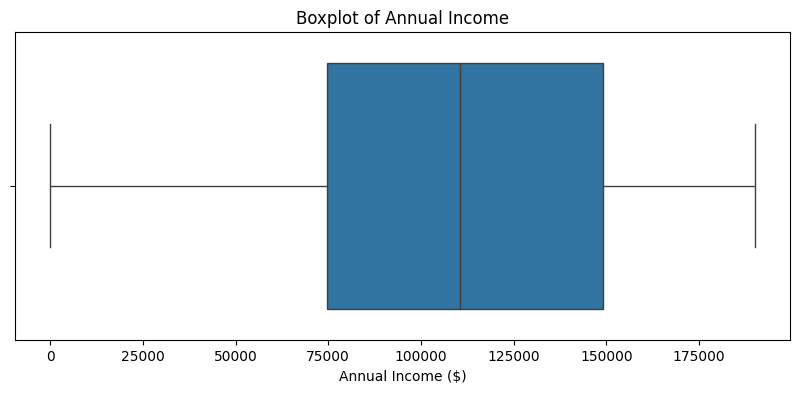

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_out["Annual Income ($)"])
plt.title("Boxplot of Annual Income")
plt.xlabel("Annual Income ($)")
plt.show()

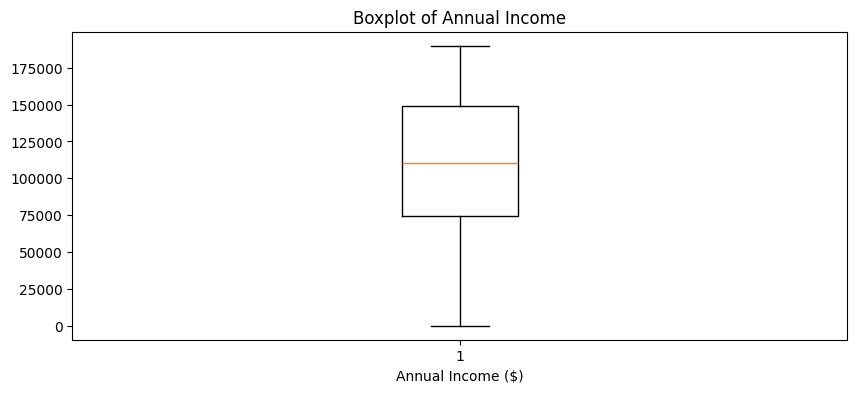

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.boxplot(df_out["Annual Income ($)"])
plt.title("Boxplot of Annual Income")
plt.xlabel("Annual Income ($)")
plt.show()